<a href="https://colab.research.google.com/github/d9249/DACON/blob/main/Specific_Train_(ImageNet_statistics%2C_meaning%2C_crop_and_pad).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Oct  5 19:16:17 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# !mkdir open_data
!unzip -uq "/content/drive/MyDrive/DACON_2021_recognize_traffic_signal_motion/new_open.zip" -d "/content/"

In [4]:
!cp /content/drive/MyDrive/pytorch_python/dataset.py .
!cp /content/drive/MyDrive/pytorch_python/specific_augmentation.py .
!cp /content/drive/MyDrive/pytorch_python/specific_dataset.py .
!cp /content/drive/MyDrive/pytorch_python/specific_train.py .
!cp /content/drive/MyDrive/pytorch_python/train.py .

In [5]:
from specific_dataset import *
from specific_train import *

import matplotlib.pyplot as plt

import torch, torchvision
import torchvision.transforms as transforms

In [6]:
import warnings

warnings.filterwarnings('ignore')

In [7]:
batch_size = 32


train_transform = transforms.Compose([
    transforms.Resize(256), transforms.RandomHorizontalFlip(),
    transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

val_transform = transforms.Compose([
    transforms.Resize(256), 
    transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])


train_dataset = MDataset(data_type='train', transform=train_transform)
val_dataset = MDataset(data_type='val', transform=val_transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [8]:
model = Baseline(model='resnet18', num_classes=39, print_freq=5, save=True, tag='M')

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [9]:
epochs = 10
lr = 0.0005
weight_decay = 0.00001

In [10]:
model.train(train_loader, val_loader, epochs=epochs, lr=lr, weight_decay=weight_decay)

Epoch 1 Started...
Best Model Saved
Iteration : 1 - Train Loss : 3.988673, Test Loss : 3.572702, Train Acc : 0.000000, Test Acc : 6.385870
Best Model Saved
Iteration : 6 - Train Loss : 2.365654, Test Loss : 2.583115, Train Acc : 37.500000, Test Acc : 34.375000
Best Model Saved
Iteration : 11 - Train Loss : 1.755716, Test Loss : 2.063265, Train Acc : 59.375000, Test Acc : 41.236413
Best Model Saved
Iteration : 16 - Train Loss : 1.633913, Test Loss : 1.351282, Train Acc : 65.625000, Test Acc : 63.790761
Best Model Saved
Iteration : 21 - Train Loss : 1.127399, Test Loss : 1.215629, Train Acc : 68.750000, Test Acc : 66.372283
Best Model Saved
Iteration : 26 - Train Loss : 1.077008, Test Loss : 1.020342, Train Acc : 75.000000, Test Acc : 68.885870
Best Model Saved
Iteration : 31 - Train Loss : 0.783800, Test Loss : 0.703874, Train Acc : 78.125000, Test Acc : 80.910326
Best Model Saved
Iteration : 36 - Train Loss : 0.835098, Test Loss : 0.692909, Train Acc : 78.125000, Test Acc : 81.182065
B

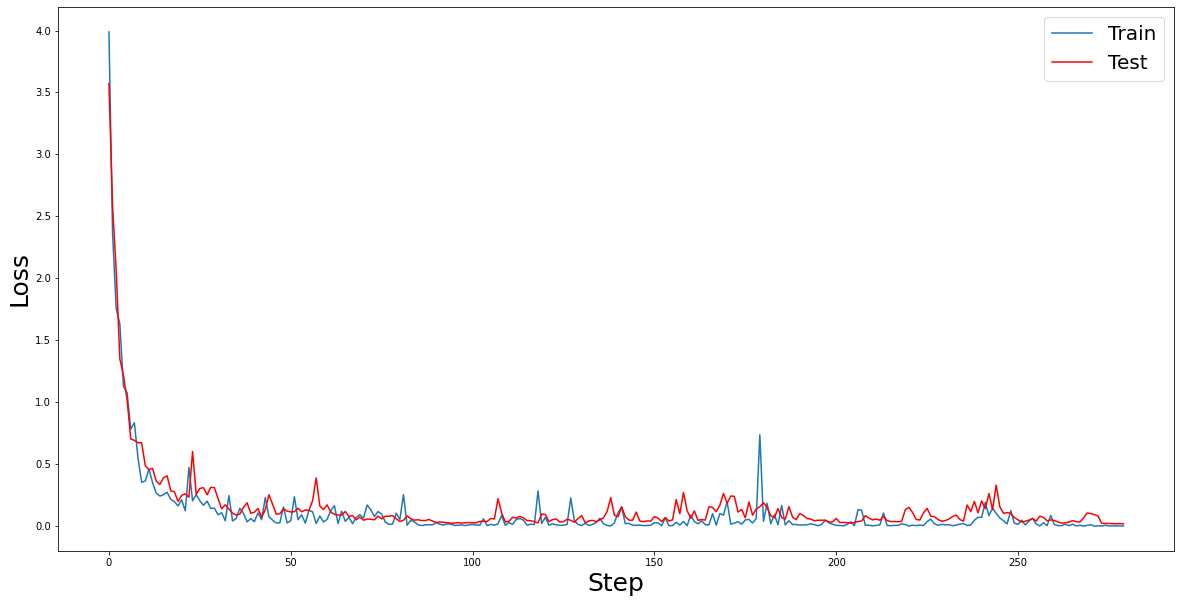

In [11]:
label_fontsize = 25

plt.figure(figsize=(20, 10))
train_lossline, = plt.plot(model.train_losses, label='Train')
test_lossline, = plt.plot(model.test_losses, color='red', label='Test')
plt.legend(handles=[train_lossline, test_lossline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Loss', fontsize=label_fontsize)
plt.show()

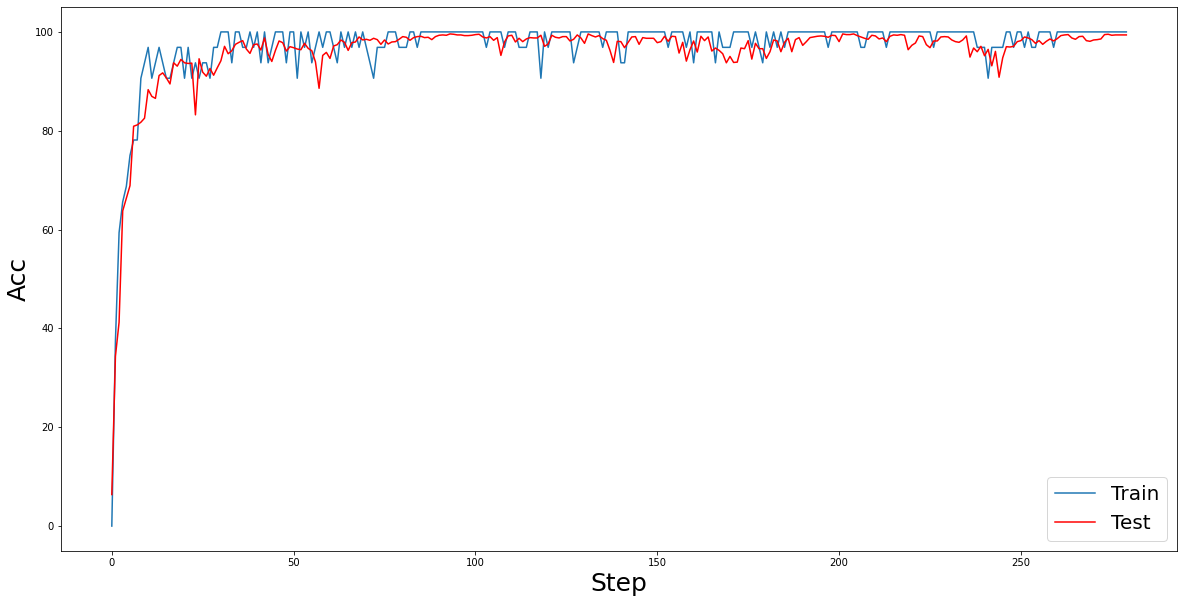

In [12]:
plt.figure(figsize=(20, 10))
train_accline, = plt.plot(model.train_acc, label='Train')
test_accline, = plt.plot(model.test_acc, color='red', label='Test')
plt.legend(handles=[train_accline, test_accline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Acc', fontsize=label_fontsize)
plt.show()